# 中期报告

### 成员：

-张登凯(3220201003)

-王英杰(5720201111) 

-邢晓宇(5720201116)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### 读取数据

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### 数据分析

数据集中共有9列，训练集416962行，测试集5164行。其中有4列是数值属性，5列是标称属性。

In [3]:
print('%d columns' % len(train.columns))
print('train: %d rows' % len(train.index))
print('test: %d rows' % len(test.index))
print(train.dtypes.value_counts())

9 columns
train: 416962 rows
test: 5164 rows
object     5
int64      2
float64    2
dtype: int64


训练集的前五行展示如下：

In [4]:
train.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1.490000e+18,NaN,runail,2.62,1,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1.490000e+18,NaN,runail,2.62,1,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5723490,1.490000e+18,NaN,runail,2.62,1,26dd6e6e-4dac-4778-8d2c-92e149dab885
3,2019-10-01 00:02:32 UTC,cart,5857283,1.490000e+18,NaN,runail,2.62,1,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:02:40 UTC,cart,5723523,1.490000e+18,NaN,runail,2.62,1,26dd6e6e-4dac-4778-8d2c-92e149dab885


测试集的前五行展示如下：

In [5]:
test.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-03 08:14:04 UTC,view,5651977,1.490000e+18,NaN,NaN,31.73,53978,ee964fbc-668b-41c9-94d5-46e5bd82d174
1,2019-10-03 08:14:41 UTC,view,37987,1.490000e+18,NaN,runail,42.86,53978,ee964fbc-668b-41c9-94d5-46e5bd82d174
2,2019-10-03 08:14:08 UTC,view,5753054,1.490000e+18,NaN,NaN,0.79,53980,3f482f26-5f0c-4bd7-bc3d-29a1ad5103ee
3,2019-10-03 08:17:21 UTC,cart,5753054,1.490000e+18,NaN,NaN,0.79,53980,3f482f26-5f0c-4bd7-bc3d-29a1ad5103ee
4,2019-10-03 08:17:24 UTC,cart,5753054,1.490000e+18,NaN,NaN,0.79,53980,3f482f26-5f0c-4bd7-bc3d-29a1ad5103ee


统计训练集每一个属性的缺失值总数。

In [6]:
train.isna().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    410798
brand            164944
price                 0
user_id               0
user_session         38
dtype: int64

统计测试集每一个属性的缺失值总数。

In [7]:
test.isna().sum()

event_time          0
event_type          0
product_id          0
category_id         0
category_code    5065
brand            2076
price               0
user_id             0
user_session        2
dtype: int64

训练集的五数概括。

In [8]:
train.describe()

,product_id,category_id,price,user_id
count,4.169620e+05,4.169620e+05,416962.000000,416962.000000
mean,5.498023e+06,1.556230e+18,8.290661,23290.071587
std,1.268676e+06,1.644289e+17,17.846968,16642.334912
min,3.752000e+03,1.490000e+18,-23.810000,1.000000
25%,5.729011e+06,1.490000e+18,2.370000,7743.000000
50%,5.809809e+06,1.490000e+18,4.110000,21213.000000
75%,5.850305e+06,1.490000e+18,7.270000,37673.000000
max,5.892800e+06,2.200000e+18,299.810000,53975.000000


测试集的五数概括。

In [9]:
test.describe()

,product_id,category_id,price,user_id
count,5.164000e+03,5.164000e+03,5164.000000,5164.000000
mean,5.452999e+06,1.544169e+18,7.135132,60802.616770
std,1.342040e+06,1.607254e+17,14.216354,6421.789687
min,3.762000e+03,1.490000e+18,0.000000,53978.000000
25%,5.711138e+06,1.490000e+18,2.050000,54193.000000
50%,5.799410e+06,1.490000e+18,3.800000,66787.000000
75%,5.848896e+06,1.490000e+18,6.270000,67021.000000
max,5.892678e+06,2.200000e+18,207.940000,67469.000000


In [10]:
def summary_column(data,col_name):
    col = data[col_name].value_counts()
    print('Colunm name:', col_name)
    print('%d different values.' % len(col))
    print()
    col = data[col_name].value_counts()
    col_data = col.to_frame()
    col_data['frequency'] = col.apply(lambda x: x / len(data.index))
    col_data.rename(columns={col_name: 'counts'}, inplace=True)
    if len(col)>15:
       print(col_data.iloc[:15])
       print('...')
    else:
        print(col_data.iloc[:len(col)])
    if len(col)>15:
       plt.bar(np.arange(15), col.iloc[:15])
    else: 
       plt.bar(np.arange(len(col)),col.iloc[:len(col)])
    plt.title(col_name)
    plt.show()

训练集属性**event_type**的统计如下。

Colunm name: event_type
4 different values.

                  counts  frequency
view              168854   0.404963
cart              155372   0.372629
remove_from_cart   68800   0.165003
purchase           23936   0.057406


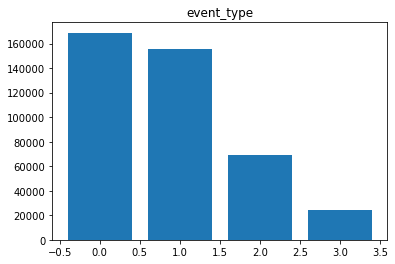

In [11]:
summary_column(train,'event_type')

测试集属性**event_type**的统计如下。

Colunm name: event_type
4 different values.

                  counts  frequency
view                2031   0.393300
cart                1952   0.378002
remove_from_cart     897   0.173703
purchase             284   0.054996


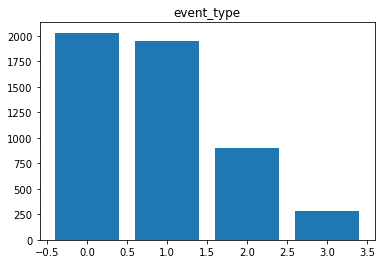

In [12]:
summary_column(test,'event_type')

训练集属性**product_id**的统计如下。

Colunm name: product_id
32734 different values.

         counts  frequency
5892179    1063   0.002549
5809912     981   0.002353
5751383     843   0.002022
5751422     831   0.001993
5849033     793   0.001902
5700037     751   0.001801
5886064     730   0.001751
5792800     690   0.001655
5886282     637   0.001528
5877454     631   0.001513
5802432     591   0.001417
5856186     530   0.001271
5773361     505   0.001211
5688124     502   0.001204
5854897     494   0.001185
...


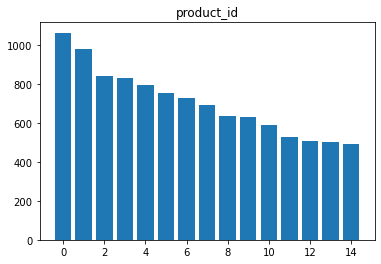

In [13]:
summary_column(train,'product_id')

测试集属性**product_id**的统计如下。

Colunm name: product_id
2691 different values.

         counts  frequency
5700037      28   0.005422
5809912      27   0.005229
5723511      22   0.004260
5723490      18   0.003486
5649236      17   0.003292
5856935      17   0.003292
5723523      15   0.002905
5849033      14   0.002711
5829276      13   0.002517
5792800      13   0.002517
5723518      12   0.002324
5526         12   0.002324
5759180      10   0.001936
5773606      10   0.001936
5751383      10   0.001936
...


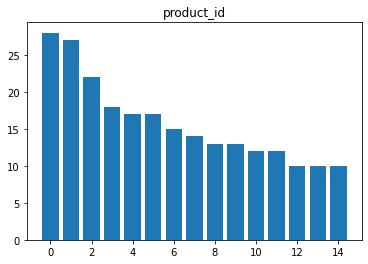

In [14]:
summary_column(test,'product_id')

训练集属性**category_id**的统计如下。

Colunm name: category_id
55 different values.

              counts  frequency
1.490000e+18  340413   0.816413
1.780000e+18   14392   0.034516
1.600000e+18    7800   0.018707
2.150000e+18    5601   0.013433
2.080000e+18    4313   0.010344
1.920000e+18    4016   0.009632
1.840000e+18    3014   0.007228
1.640000e+18    2751   0.006598
1.660000e+18    2702   0.006480
1.530000e+18    2616   0.006274
1.900000e+18    1867   0.004478
1.890000e+18    1555   0.003729
1.980000e+18    1514   0.003631
2.200000e+18    1394   0.003343
2.190000e+18    1324   0.003175
...


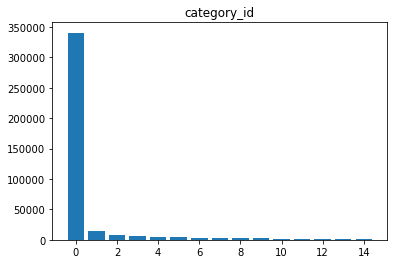

In [15]:
summary_column(train,'category_id')

测试集属性**category_id**的统计如下。

Colunm name: category_id
45 different values.

              counts  frequency
1.490000e+18    4489   0.869287
1.600000e+18     117   0.022657
1.780000e+18      91   0.017622
2.080000e+18      70   0.013555
2.150000e+18      51   0.009876
2.200000e+18      38   0.007359
2.110000e+18      24   0.004648
2.140000e+18      24   0.004648
2.010000e+18      22   0.004260
2.190000e+18      19   0.003679
1.900000e+18      18   0.003486
2.060000e+18      17   0.003292
1.920000e+18      17   0.003292
1.940000e+18      14   0.002711
1.500000e+18      13   0.002517
...


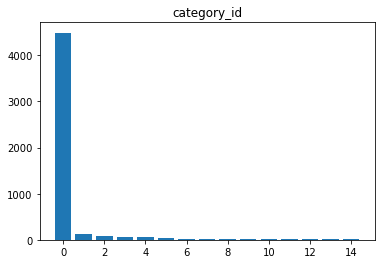

In [16]:
summary_column(test,'category_id')

训练集属性**brand**的统计如下。

Colunm name: brand
222 different values.

           counts  frequency
runail      40857   0.097987
irisk       18348   0.044004
masura      14395   0.034524
bpw.style   10712   0.025691
grattol      9901   0.023746
ingarden     8476   0.020328
bluesky      7643   0.018330
estel        6500   0.015589
kapous       5072   0.012164
uno          4712   0.011301
freedecor    4626   0.011095
cnd          4513   0.010824
haruyama     4293   0.010296
pole         4251   0.010195
oniq         4044   0.009699
...


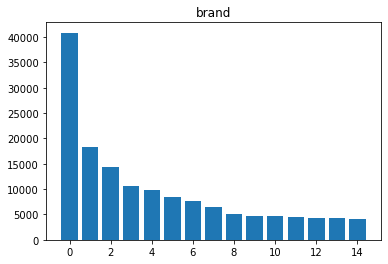

In [17]:
summary_column(train,'brand')

测试集属性**brand**的统计如下。

Colunm name: brand
125 different values.

           counts  frequency
runail        733   0.141944
irisk         243   0.047057
bpw.style     175   0.033888
masura        141   0.027304
ingarden      141   0.027304
grattol       136   0.026336
haruyama      120   0.023238
cnd           102   0.019752
estel          85   0.016460
freedecor      60   0.011619
milv           60   0.011619
kapous         58   0.011232
concept        56   0.010844
uno            47   0.009101
bluesky        47   0.009101
...


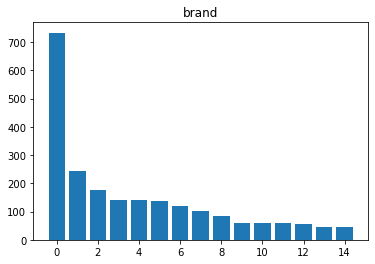

In [18]:
summary_column(test,'brand')

训练集属性**user_id**的统计如下。

Colunm name: user_id
53975 different values.

       counts  frequency
6607     2355   0.005648
31528     801   0.001921
27732     640   0.001535
45594     636   0.001525
3866      553   0.001326
2868      542   0.001300
3226      482   0.001156
5915      471   0.001130
11650     462   0.001108
3835      459   0.001101
46751     418   0.001002
5907      417   0.001000
51789     409   0.000981
2558      399   0.000957
3850      389   0.000933
...


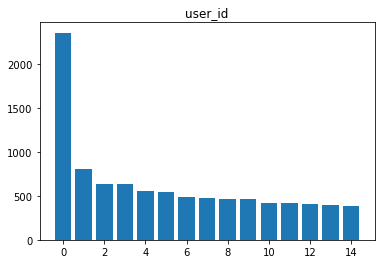

In [19]:
summary_column(train,'user_id')

测试集属性**user_id**的统计如下。

Colunm name: user_id
558 different values.

       counts  frequency
54193     141   0.027304
54284     139   0.026917
54081      98   0.018978
54241      86   0.016654
67010      83   0.016073
66877      76   0.014717
67040      71   0.013749
54385      67   0.012974
54333      62   0.012006
54165      62   0.012006
67398      57   0.011038
66835      55   0.010651
54071      49   0.009489
67098      48   0.009295
54004      48   0.009295
...


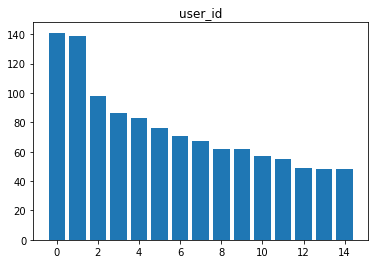

In [20]:
summary_column(test,'user_id')

### 数据清理
通过上述简要的数据分析，发现存在属性**price**小于0的记录，因此需要将这些记录清除。

除此之外，由于属性**category_code**和**user_session**具有缺失值，且对问题分析帮助不大，也将其清除。

In [21]:
cols=['category_code','user_session']
train_clear = train.drop(train[train.iloc[:,6]< 0].index)
train_clear = train_clear.drop(cols,axis=1)
train_clear.describe(include='all')

,event_time,event_type,product_id,category_id,brand,price,user_id
count,416960,416960,4.169600e+05,4.169600e+05,252018,416960.000000,416960.000000
unique,173711,4,NaN,NaN,222,NaN,NaN
top,2019-10-02 20:37:56 UTC,view,NaN,NaN,runail,NaN,NaN
freq,102,168854,NaN,NaN,40857,NaN,NaN
mean,NaN,NaN,5.498022e+06,1.556230e+18,NaN,8.290777,23290.138332
std,NaN,NaN,1.268679e+06,1.644292e+17,NaN,17.846924,16642.343423
min,NaN,NaN,3.752000e+03,1.490000e+18,NaN,0.000000,1.000000
25%,NaN,NaN,5.729011e+06,1.490000e+18,NaN,2.370000,7743.000000
50%,NaN,NaN,5.809809e+06,1.490000e+18,NaN,4.110000,21213.500000
75%,NaN,NaN,5.850305e+06,1.490000e+18,NaN,7.270000,37673.000000


In [22]:
test_clear = test.drop(test[test.iloc[:,6]< 0].index)
test_clear = test_clear.drop(cols,axis=1)
test_clear.describe(include='all')

,event_time,event_type,product_id,category_id,brand,price,user_id
count,5164,5164,5.164000e+03,5.164000e+03,3088,5164.000000,5164.000000
unique,3620,4,NaN,NaN,125,NaN,NaN
top,2019-10-03 18:21:08 UTC,view,NaN,NaN,runail,NaN,NaN
freq,31,2031,NaN,NaN,733,NaN,NaN
mean,NaN,NaN,5.452999e+06,1.544169e+18,NaN,7.135132,60802.616770
std,NaN,NaN,1.342040e+06,1.607254e+17,NaN,14.216354,6421.789687
min,NaN,NaN,3.762000e+03,1.490000e+18,NaN,0.000000,53978.000000
25%,NaN,NaN,5.711138e+06,1.490000e+18,NaN,2.050000,54193.000000
50%,NaN,NaN,5.799410e+06,1.490000e+18,NaN,3.800000,66787.000000
75%,NaN,NaN,5.848896e+06,1.490000e+18,NaN,6.270000,67021.000000


### 用户画像

根据训练集和测试集，分别描绘出客户的理想价钱区间、购物频次和最喜欢的品牌属性。

其中，理想价钱区间根据用户的购买记录的价钱的四分位数构成。若该用户没有购买记录，则依据所有客户的购买记录生成理想价钱区间。

最喜欢的品牌根据用户的购买、浏览和加入购物车记录的品牌属性的众数构成。若该用户没有上述记录，则依据所有记录的品牌属性的众数构成。

In [23]:
user_id_train = set(train_clear['user_id'].tolist())
user_id_test = set(test_clear['user_id'].tolist())

user_id = np.empty((len(user_id_train),1))
percentile_25 = np.empty((len(user_id_train),1))
percentile_75 = np.empty((len(user_id_train),1))
counts = np.empty((len(user_id_train),1))
favoriate_brand = []
purchase = train_clear[(train_clear['event_type'] == 'purchase')]
price = np.array(purchase['price'])
twenty_five = np.percentile(price,0.25)
seventy_five = np.percentile(price,0.75)
j = 0
for i in user_id_train:
    user_id[j,0] = i
    middle1 = train_clear[(train_clear['user_id'] == i)]
    middle2 = middle1[(middle1['event_type'] == 'purchase')]
    counts[j,0] = middle2.shape[0]
    price = np.array(middle2['price'])
    middle3 = middle1[middle1['event_type'].isin(['purchase', 'view', 'cart'])]
    favoriate = middle3['brand'].value_counts()
    favoriate_data = favoriate.to_frame()
    if len(favoriate_data):
        favoriate_brand.append(favoriate_data[0:1]._stat_axis.values[0])
    else:
        favoriate_brand.append('runail')
    if len(price):
        percentile_25[j,0] = np.percentile(price,0.25)
        percentile_75[j,0] = np.percentile(price,0.75)
    else:
        percentile_25[j,0] = twenty_five
        percentile_75[j,0] = seventy_five
    j = j + 1
user_describe_train = pd.DataFrame(user_id)
user_describe_train.columns=['user_id']
user_describe_train['25%']=percentile_25
user_describe_train['75%']=percentile_75
user_describe_train['purchase_counts']=counts
user_describe_train['favoriate_brand']=favoriate_brand

user_id = np.empty((len(user_id_test),1))
percentile_25 = np.empty((len(user_id_test),1))
percentile_75 = np.empty((len(user_id_test),1))
counts = np.empty((len(user_id_test),1))
favoriate_brand = []
purchase = test_clear[(test_clear['event_type'] == 'purchase')]
price = np.array(purchase['price'])
twenty_five = np.percentile(price,0.25)
seventy_five = np.percentile(price,0.75)
j = 0
for i in user_id_test:
    user_id[j,0] = i
    middle1 = test_clear[(test_clear['user_id'] == i)]
    middle2 = middle1[(middle1['event_type'] == 'purchase')]
    counts[j,0] = middle2.shape[0]
    price = np.array(middle2['price'])
    middle3 = middle1[middle1['event_type'].isin(['purchase', 'view', 'cart'])]
    favoriate = middle3['brand'].value_counts()
    favoriate_data = favoriate.to_frame() 
    if len(favoriate_data):
        favoriate_brand.append(favoriate_data[0:1]._stat_axis.values[0]) 
    else:
        favoriate_brand.append('runail') 
    if len(price):
        percentile_25[j,0] = np.percentile(price,0.25)
        percentile_75[j,0] = np.percentile(price,0.75)
    else:
        percentile_25[j,0] = twenty_five
        percentile_75[j,0] = seventy_five
    j = j + 1
user_describe_test = pd.DataFrame(user_id)
user_describe_test.columns=['user_id']
user_describe_test['25%']=percentile_25
user_describe_test['75%']=percentile_75
user_describe_test['purchase_counts']=counts
user_describe_test['favoriate_brand']=favoriate_brand

In [24]:
user_describe_train.head()

,user_id,25%,75%,purchase_counts,favoriate_brand
0,1.0,0.32360,0.33080,19.0,runail
1,2.0,0.08480,0.09440,7.0,nagaraku
2,3.0,0.22000,0.30000,0.0,runail
3,4.0,0.22000,0.30000,0.0,estel
4,5.0,0.29255,0.29765,35.0,runail


In [25]:
user_describe_test.head()

,user_id,25%,75%,purchase_counts,favoriate_brand
0,53978.0,0.226875,0.3200,0.0,runail
1,53980.0,0.794400,0.8032,3.0,runail
2,53982.0,0.226875,0.3200,0.0,cnd
3,53985.0,0.226875,0.3200,0.0,metzger
4,53986.0,0.226875,0.3200,0.0,runail
